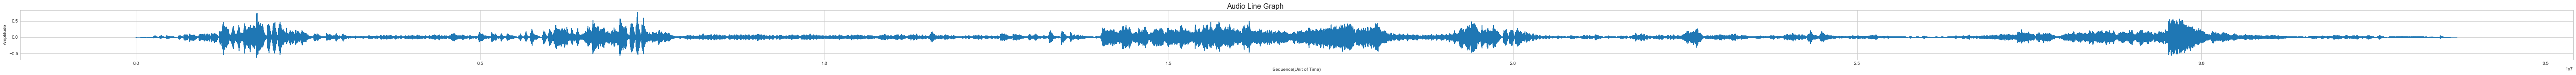

In [137]:
import numpy as np
import matplotlib.pyplot as plt
amp_data = np.load('amp_data.npz')['amp_data']
linegraph = plt.figure(figsize=(100, 2))
linegraph.suptitle("Audio Line Graph",fontsize = 16)
plt.xlabel("Sequence(Unit of Time)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.plot(amp_data)
plt.show()

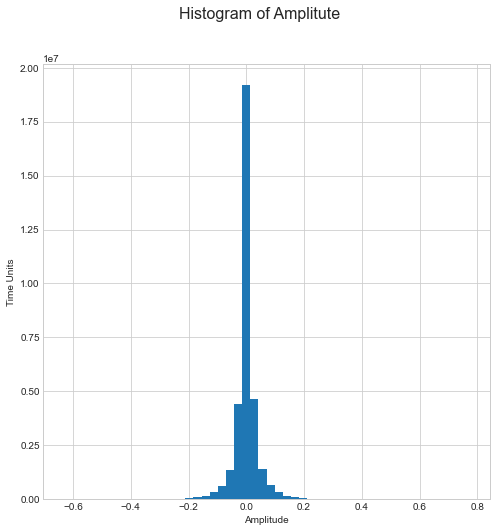

In [39]:
# plt.title("Histogram of Amplitute",fontsize = 16)
histogram = plt.figure(figsize=(8, 8))
histogram.suptitle("Histogram of Amplitute",fontsize = 16)
plt.xlabel("Amplitude")
plt.ylabel("Time Units")
plt.grid(True)
plt.hist(amp_data,bins=50)
plt.show()

In [82]:
size_amp = len(amp_data)
# Split the data into parts for training (70%), validation (15%), and testing (15%)
train_size = int(size_amp//21 * 0.7)
valid_size = int(size_amp//21 * 0.15)
test_size = int(size_amp//21 * 0.15)
C = train_size + valid_size + test_size

print("training data = ",train,"\nvalidation data = ",valid,"\ntesting data = ",test,"\nC = ",C)

#Randomly discard elements before reshaping the data
# discard_size 
discard_index = np.random.choice(size_amp,size=(size_amp - C*21),replace=False)
chose = np.delete(amp_data,discard_index).reshape((C,21))
#Shuffle by rows
np.random.shuffle(chose)
X_shuf_train = chose[0:train_size,0:20] 
X_shuf_val = chose[train_size:train_size+valid_size,0:20]
X_shuf_test = chose[train_size+valid_size:,0:20] 
y_shuf_train = chose[0:train_size,20]
y_shuf_val = chose[train_size:train_size+valid_size,20]
y_shuf_test = chose[train_size+valid_size:,20] 


training data =  1123775 
validation data =  240809 
testing data =  240809 
C =  1605393


In [83]:
print(X_shuf_train.shape[0],X_shuf_train.shape[1])
print(y_shuf_train.shape[0])

1123775 20
1123775


In [87]:
def estimate_quartic_coef(x, y):
    # number of observations/points
    n = np.size(x)
 
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
 
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
 
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
 
    return (b_0, b_1)

In [88]:
def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
 
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
 
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
 
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
 
    return (b_0, b_1)

# X axis is the time from 0 to 1
x = np.arange(20)/20
index = np.random.chose(train_size,size = 1, replace=Flase)# Choose one row of X_shuf_train data
y = X_shuf_train[index]

# plotting the observed points as scatter plot
plt.scatter(x, y, color = "m", marker = "o", s = 30)

# plotting the regression line
b_linear = estimate_coef(x,y)# estimating linear coefficients
b_quartic = estimate_coef(x,y)
x_test = 1
y_test = y_shuf_train[index]
plt.scatter(x_test, y_test, color = "b", marker = "x", s = 40)# scatter predicted linear 

y_pred_linear = b[0] + b[1] * x
plt.plot(x, y_pred_linear, color = "g")

# putting labels
plt.xlabel('Time')
plt.ylabel('Amplitude')

# function to show plot
plt.show()

# plotting regression line
plot_regression_line(x, y, b)

AttributeError: module 'numpy.random' has no attribute 'chose'

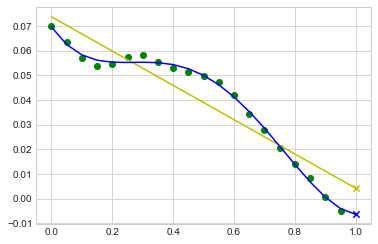

In [121]:

# X axis is the time from 0 to 1
x = np.arange(20)/20
index = np.random.choice(train_size,size = 1, replace=False)# Choose one row of X_shuf_train data
y = X_shuf_train[index][0]

#polynomial fit with degree = 1
model_linear = np.poly1d(np.polyfit(x, y, 1))
#polynomial fit with degree = 4
model_quartic = np.poly1d(np.polyfit(x, y, 4))

#add fitted polynomial line to scatterplot
plt.scatter(x, y, color = "g")
#plot fits between t=0 and t=1
x_test = 1 # test point
xx = np.append(x,x_test)
plt.plot(xx, model_linear(xx),color = "y")
plt.scatter(x_test, model_linear(x_test), color = "y", marker = "x", s = 40)# test predicted linear 
plt.plot(xx, model_quartic(xx),color = "b")
plt.scatter(x_test, model_quartic(x_test), color = "b", marker = "x", s = 40)# test predicted quartic
plt.show()

[-0.01235962 -0.01202393 -0.01153564 -0.01095581 -0.00991821 -0.00872803
 -0.00741577 -0.00588989 -0.00448608 -0.00289917 -0.00149536 -0.00036621
  0.00045776  0.00079346  0.00091553  0.00039673 -0.00018311 -0.00109863
 -0.00167847 -0.00231934]


/Users/babe/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


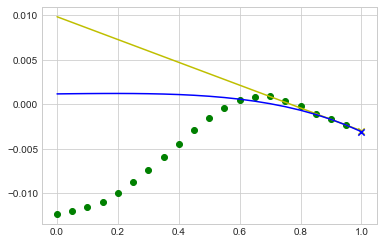

In [133]:

# X axis is the time from 0 to 1
x = np.arange(20)/20
index = np.random.choice(train_size,size = 1, replace=False)# Choose one row of X_shuf_train data
y = X_shuf_train[index][0]
#polynomial fit with degree = 1
model_linear = np.poly1d(np.polyfit(x[18:20], y[18:20], 1))
#polynomial fit with degree = 4
model_quartic = np.poly1d(np.polyfit(x[18:20], y[18:20], 4))

#add fitted polynomial line to scatterplot
plt.scatter(x, y, color = "g")
#plot fits between t=0 and t=1
x_test = 1 # test point
xx = np.append(x,x_test)
plt.plot(xx, model_linear(xx),color = "y")
plt.scatter(x_test, model_linear(x_test), color = "y", marker = "x", s = 40)# test predicted linear 
plt.plot(xx, model_quartic(xx),color = "b")
plt.scatter(x_test, model_quartic(x_test), color = "b", marker = "x", s = 40)# test predicted quartic
plt.show()

In [136]:
y = X_shuf_train[8]
print(y)

[ 0.01263428  0.01138306  0.00997925  0.00848389  0.00692749  0.00531006
  0.00372314  0.00241089  0.00115967  0.00039673 -0.00033569 -0.00064087
 -0.00094604 -0.0007019  -0.0005188   0.00015259  0.00039673  0.0007019
  0.00045776 -0.00015259]
